In [124]:
# Let's first load the provided CSV file to understand its structure and contents for the EDA (Exploratory Data Analysis).
import pandas as pd

# Load the dataset
df = pd.read_csv('consumption_and_temperatures.csv')

# Display the first few rows of the dataframe to understand its structure and columns
df.head()


,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature
0,2017-05-01 00:00:00+00:00,3325.431995,2.1,3534.588,5.0,2674.838,5.5,2061.209,0.2,1609.089,3.9
1,2017-05-01 01:00:00+00:00,3344.690998,1.8,3560.209,4.1,2678.188,4.0,2045.436,0.1,1623.485,3.2
2,2017-05-01 02:00:00+00:00,3398.359002,3.2,3596.149,3.1,2678.341,3.7,2020.007,0.1,1634.128,2.7
3,2017-05-01 03:00:00+00:00,3430.220001,3.6,3594.042,2.3,2684.172,3.2,2021.920,0.1,1647.906,2.3
4,2017-05-01 04:00:00+00:00,3606.750000,3.4,3665.091,2.6,2733.345,2.7,2045.913,0.1,1679.176,2.3


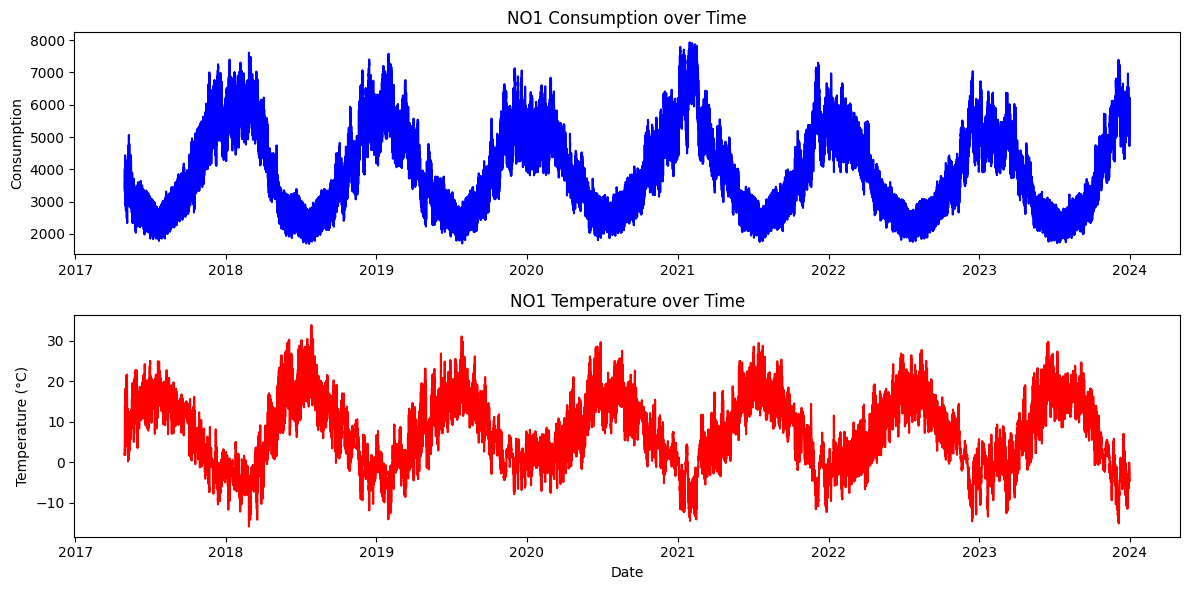

First date: 2017-05-01 00:00:00+00:00
Last date: 2023-12-31 23:00:00+00:00
Missing values:
NO1_consumption    0
NO1_temperature    0
NO2_consumption    0
NO2_temperature    0
NO3_consumption    0
NO3_temperature    0
NO4_consumption    0
NO4_temperature    0
NO5_consumption    0
NO5_temperature    0
dtype: int64


In [125]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime and set it as index for better analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Plotting trends in consumption and temperature for NO1
plt.figure(figsize=(12, 6))

# Consumption plot for NO1
plt.subplot(2, 1, 1)
plt.plot(df.index, df['NO1_consumption'], label='NO1 Consumption', color='blue')
plt.title('NO1 Consumption over Time')
plt.ylabel('Consumption')

# Temperature plot for NO1
plt.subplot(2, 1, 2)
plt.plot(df.index, df['NO1_temperature'], label='NO1 Temperature', color='red')
plt.title('NO1 Temperature over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

# Print first and last date
print(f"First date: {df.index[0]}")
print(f"Last date: {df.index[-1]}")

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

## Normalisation

In [126]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the columns to be normalized
columns_to_normalize = [
    'NO1_consumption', 'NO1_temperature',
    'NO2_consumption', 'NO2_temperature',
    'NO3_consumption', 'NO3_temperature',
    'NO4_consumption', 'NO4_temperature',
    'NO5_consumption', 'NO5_temperature']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler to the data and transforming it
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns_to_normalize]), columns=columns_to_normalize, index=df.index)

# Storing the min and range (max-min) for each column to allow inverse transformation
min_values = scaler.data_min_
range_values = scaler.data_max_ - scaler.data_min_

# Creating a dictionary for min and range values for later inverse transformation
scaling_info = {column: {'min': min_val, 'range': range_val} for column, min_val, range_val in zip(columns_to_normalize, min_values, range_values)}

scaling_info


{'NO1_consumption': {'min': 1690.051994, 'range': 6238.619001000001},
 'NO1_temperature': {'min': -15.9, 'range': 49.699999999999996},
 'NO2_consumption': {'min': 2660.89, 'range': 4179.163130000001},
 'NO2_temperature': {'min': -15.7, 'range': 47.3},
 'NO3_consumption': {'min': 1992.632558, 'range': 2763.371481},
 'NO3_temperature': {'min': -23.5, 'range': 57.0},
 'NO4_consumption': {'min': 1364.340713, 'range': 1847.1555549999998},
 'NO4_temperature': {'min': -16.3, 'range': 45.7},
 'NO5_consumption': {'min': 989.346588, 'range': 2908.522084},
 'NO5_temperature': {'min': -12.0, 'range': 44.1}}

In [127]:
# Example: Converting a normalized value back to its original scale for NO1_consumption
normalized_value = 0.5
min_value = scaling_info['NO1_consumption']['min']
range_value = scaling_info['NO1_consumption']['range']

original_value = (normalized_value * range_value) + min_value
original_value


4809.361494500001

## Feature Engineering

Following features are created in line with the assignment:
- time_of_day
- time_of_week
- time_of_year
- lag_1_hour
- lag_24_hours

The time features will be normalised and the lag features will be created after splitting the data set into it's regions. For now, the time of week is just the normalised weekday. Meaning, it doesn't include any hourly changes. The same goes for the time of year.

In [128]:
# Extracting time features
df['time_of_day'] = df.index.hour
df['time_of_week'] = df.index.dayofweek
df['time_of_year'] = df.index.dayofyear

# Normalizing the time features
timeScaler = MinMaxScaler()
time_features = ['time_of_day', 'time_of_week', 'time_of_year']
df_normalized[time_features] = timeScaler.fit_transform(df[time_features])

df_normalized.head()

,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature,time_of_day,time_of_week,time_of_year
timestamp,,,,,,,,,,,,,
2017-05-01 00:00:00+00:00,0.262138,0.362173,0.209061,0.437632,0.246874,0.508772,0.377266,0.361050,0.213078,0.360544,0.000000,0.0,0.328767
2017-05-01 01:00:00+00:00,0.265225,0.356137,0.215191,0.418605,0.248087,0.482456,0.368727,0.358862,0.218028,0.344671,0.043478,0.0,0.328767
2017-05-01 02:00:00+00:00,0.273828,0.384306,0.223791,0.397463,0.248142,0.477193,0.354960,0.358862,0.221687,0.333333,0.086957,0.0,0.328767
2017-05-01 03:00:00+00:00,0.278935,0.392354,0.223287,0.380550,0.250252,0.468421,0.355996,0.358862,0.226424,0.324263,0.130435,0.0,0.328767
2017-05-01 04:00:00+00:00,0.307231,0.388330,0.240288,0.386892,0.268047,0.459649,0.368985,0.358862,0.237175,0.324263,0.173913,0.0,0.328767


In [129]:
# Splitting the data into its 5 locations
NO1 = df_normalized[['NO1_consumption', 'NO1_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()
NO2 = df_normalized[['NO2_consumption', 'NO2_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()
NO3 = df_normalized[['NO3_consumption', 'NO3_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()
NO4 = df_normalized[['NO4_consumption', 'NO4_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()
NO5 = df_normalized[['NO5_consumption', 'NO5_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()

# Renaming the columns for each location
NO1.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']
NO2.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']
NO3.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']
NO4.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']
NO5.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']

In [130]:
# Add the features lag_1_hour and lag_24_hours to the datasets
def add_lag_features(df):
    df.loc[:, 'lag_1_hour'] = df['consumption'].shift(1)
    df.loc[:, 'lag_24_hours'] = df['consumption'].shift(24)
    # Remove the first 24h rows with NaN values created by shifting
    df.dropna(inplace=True)

add_lag_features(NO1)
add_lag_features(NO2)
add_lag_features(NO3)
add_lag_features(NO4)
add_lag_features(NO5)

NO1.head()

,consumption,temperature,time_of_day,time_of_week,time_of_year,lag_1_hour,lag_24_hours
timestamp,,,,,,,
2017-05-02 00:00:00+00:00,0.243640,0.380282,0.000000,0.166667,0.331507,0.245651,0.262138
2017-05-02 01:00:00+00:00,0.250336,0.368209,0.043478,0.166667,0.331507,0.243640,0.265225
2017-05-02 02:00:00+00:00,0.263287,0.368209,0.086957,0.166667,0.331507,0.250336,0.273828
2017-05-02 03:00:00+00:00,0.287778,0.356137,0.130435,0.166667,0.331507,0.263287,0.278935
2017-05-02 04:00:00+00:00,0.370562,0.360161,0.173913,0.166667,0.331507,0.287778,0.307231


In [131]:

# Splitting the data into training, validation, and test sets
""" The year 2023 will be the test set,
2022 will be the validation set,
and the rest will be the training set. """

# Splitting the data into training, validation, and test sets
NO1_train, NO1_val, NO1_test = NO1[:'2021-12-31'], NO1['2022-01-01':'2022-12-31'], NO1['2023-01-01':]
NO2_train, NO2_val, NO2_test = NO2[:'2021-12-31'], NO2['2022-01-01':'2022-12-31'], NO2['2023-01-01':]
NO3_train, NO3_val, NO3_test = NO3[:'2021-12-31'], NO3['2022-01-01':'2022-12-31'], NO3['2023-01-01':]
NO4_train, NO4_val, NO4_test = NO4[:'2021-12-31'], NO4['2022-01-01':'2022-12-31'], NO4['2023-01-01':]
NO5_train, NO5_val, NO5_test = NO5[:'2021-12-31'], NO5['2022-01-01':'2022-12-31'], NO5['2023-01-01':]

# Checking the percentual length of the sets
print(f"Training set length: {100*len(NO1_train)/len(NO1):.2f}%")
print(f"Validation set length: {100*len(NO1_val)/len(NO1):.2f}%")
print(f"Test set length: {100*len(NO1_test)/len(NO1):.2f}%")

Training set length: 70.02%
Validation set length: 14.99%
Test set length: 14.99%


In [132]:
# Save the 15 preprocessed datasets to CSV files
NO1_train.to_csv('preprocessed_datasets/NO1_train.csv')
NO1_val.to_csv('preprocessed_datasets/NO1_val.csv')
NO1_test.to_csv('preprocessed_datasets/NO1_test.csv')

NO2_train.to_csv('preprocessed_datasets/NO2_train.csv')
NO2_val.to_csv('preprocessed_datasets/NO2_val.csv')
NO2_test.to_csv('preprocessed_datasets/NO2_test.csv')

NO3_train.to_csv('preprocessed_datasets/NO3_train.csv')
NO3_val.to_csv('preprocessed_datasets/NO3_val.csv')
NO3_test.to_csv('preprocessed_datasets/NO3_test.csv')

NO4_train.to_csv('preprocessed_datasets/NO4_train.csv')
NO4_val.to_csv('preprocessed_datasets/NO4_val.csv')
NO4_test.to_csv('preprocessed_datasets/NO4_test.csv')

NO5_train.to_csv('preprocessed_datasets/NO5_train.csv')
NO5_val.to_csv('preprocessed_datasets/NO5_val.csv')
NO5_test.to_csv('preprocessed_datasets/NO5_test.csv')